In [1]:
import nibabel as nib
import nilearn as nil
from nipy.algorithms.registration import affine
import numpy as np
from nilearn import image, plotting
from matplotlib import pyplot as plt
import csv

%matplotlib inline

In [2]:
def sphere(shape, radius, position):
    semisizes = (radius,) * 3

    grid = [slice(-x0, dim - x0) for x0, dim in zip(position, shape)]
    position = np.ogrid[grid]

    arr = np.zeros(shape, dtype=float)
    for x_i, semisize in zip(position, semisizes):
        arr += (np.abs(x_i / semisize) ** 2)

    return arr <= 1.0

In [6]:
mni = nib.load('../MNI152_T1_1mm_brain.nii.gz')
invaff = affine.inverse_affine(mni.affine)

In [13]:
powerROI = np.zeros(mni.shape, dtype=int)
rad = 5

while True:
    with open('../power/mnicoords.csv', 'r') as csvfile:
        posreader = csv.reader(csvfile.read().splitlines())
        for pos in posreader:
            pos = [int(p) for p in pos]
            coords = image.coord_transform(pos[1], pos[2], pos[3], invaff)
            tmproi = sphere(mni.shape, rad, coords)
            powerROI[tmproi == 1] = pos[0]
    break;

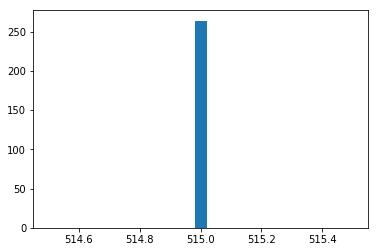

In [14]:
hist = plt.hist([len(powerROI[powerROI == p]) for p in np.unique(powerROI) if p > 0], bins=25)

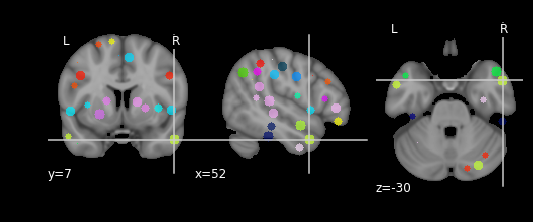

In [23]:
power = nib.Nifti1Image(powerROI, mni.affine)
brainplot = plotting.plot_roi(power, mni)

In [25]:
nib.save(power, '../power/ROI_264_MNI_1mm.nii.gz')